<b>Описание проекта: Аналитика работы интернет-магазина. Составление списка гипотез для увеличения выручки их приоритизация и анализ, A/B-тест и анализ результатов.</b>

<b> Содержание:</b>
1. [Получение данных, изучение информации, подготовка данных.](##step1) 

2. [Приоритизация гипотез.](##step2)

3. [Анализ A/B-теста.](##step3)


<a id='#step1'></a>
<b> 1. Получение данных, изучение информации, подготовка данных. 

In [1]:
#загрузим библиотеки
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10,6)
pd.options.display.max_colwidth = 150

In [2]:
hipo = pd.read_csv('/datasets/hypothesis.csv')#, sep="\t")
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [3]:
hipo

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
#print(orders.describe())
print('-----------')
orders.info()
orders.head(5)

-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [5]:
visitors.info()
visitors.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [6]:
#переименуем столбцы
orders.columns = ['tr_id','u_id','date','revenue','group']
hipo.columns = ['hypothesis','reach','impact','confidence','efforts']

In [7]:
#изменим типы данных
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [8]:
#удалим дубликаты во всех таблицах
hipo.drop_duplicates()
orders.drop_duplicates()
visitors.drop_duplicates().head(2)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619


Вывод:

Исправлены названия столбцов, а также типы данных на корректные в стобцах с датой. 

Удалены дубликаты. 

Из проверки таблиц методом info() видим, что пропусков в таблицах нет, значит доработка и заполнение не требуется.

<a id='#step2'></a>
<b> 2. Приоритизация гипотез.</b>

In [9]:
#Применение фреймворка ICE для приоритизации гипотез
hipo['ICE']=(hipo['impact']*hipo['confidence']/hipo['efforts']).astype('int')
hipo[['hypothesis','ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1


In [10]:
# Применение фреймворка RICE для приоритизации гипотез
hipo['RICE']=(hipo['reach']*hipo['impact']*hipo['confidence']/hipo['efforts']).astype('int')
hipo[['hypothesis','RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40
8,"Запустить акцию, дающую скидку на товар в день рождения",16
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3


Как видим приоритезация гипотез при применении RICE вместо ICE изменилась. Теперь на первых местах 7,2 и 0 гипотезы, вместо 8,0 и 7. Почему так произошло?

Потому что параметр RICE учитывает количество пользователей, на которых повлияет изменение указанное в гипотезе и по этой причине является более информативным и помогает принимать решения с учетом охвата аудитории.

<a id='#step3'></a>
<b> 3. Анализ А\В теста.</b>

Подготовим кумулятивные данные:

In [11]:
datesGroups = orders[['date','group']].drop_duplicates()
datesGroups.head(2)

,date,group
0,2019-08-15,B
2,2019-08-15,A


In [12]:
ord_agg = datesGroups.apply(
lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'tr_id' : pd.Series.nunique,
'u_id' : pd.Series.nunique,
'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
ord_agg.head(2)

,date,group,tr_id,u_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217


In [13]:
vis_agg = datesGroups.apply(
lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
'date' : 'max',
'group' : 'max',
'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
vis_agg.head(2)

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713


In [14]:
cum_data = ord_agg.merge(vis_agg, left_on=['date', 'group'], right_on=['date', 'group'])
cum_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cum_data.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


<b>3.1. График кумулятивной выручки по группам. Выводы и предположения.</b>

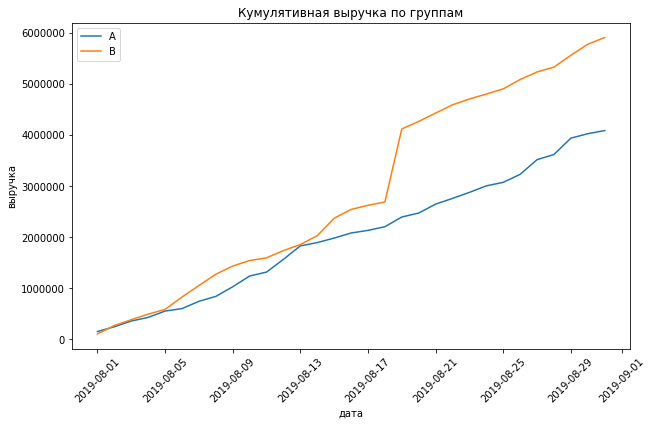

In [15]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cum_rev_a = cum_data[cum_data['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cum_rev_b = cum_data[cum_data['group']=='B'][['date','revenue', 'orders']]

# Строим графики выручки группы А и В
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

plt.plot(cum_rev_a['date'], cum_rev_a['revenue'], label='A')
plt.plot(cum_rev_b['date'], cum_rev_b['revenue'], label='B')
plt.xticks(rotation=45)
plt.title('Кумулятивная выручка по группам');
plt.ylabel('выручка');
plt.xlabel('дата');
plt.legend();

Видим, что выручка почти равномерно увеличивается в течение всего теста. Однако график выручки В в одной точке резко растет. Это может сигнализировать о выбросах в данных, которые будут проанализированы ниже.

<b>3.2. График кумулятивного среднего чека по группам. Выводы и предположения.</b>

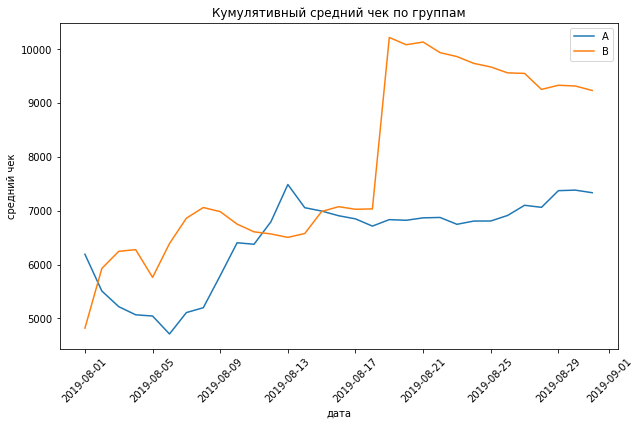

In [16]:
plt.plot(cum_rev_a['date'], cum_rev_a['revenue']/cum_rev_a['orders'], label='A')
plt.plot(cum_rev_b['date'], cum_rev_b['revenue']/cum_rev_b['orders'], label='B')
plt.xticks(rotation=45)
plt.title('Кумулятивный средний чек по группам');
plt.ylabel('средний чек');
plt.xlabel('дата');
plt.legend();

По кумулятивным средним чекам картина похожая с кумулятивной выручкой: графики стабилизируются ближе к концу, а в середине имеют резкие перепады. Возможно в группу В попали крупные заказы, которые образуют эти скачки.

<b> 3.3. График относительного изменения кумулятивного среднего чека группы B к группе A

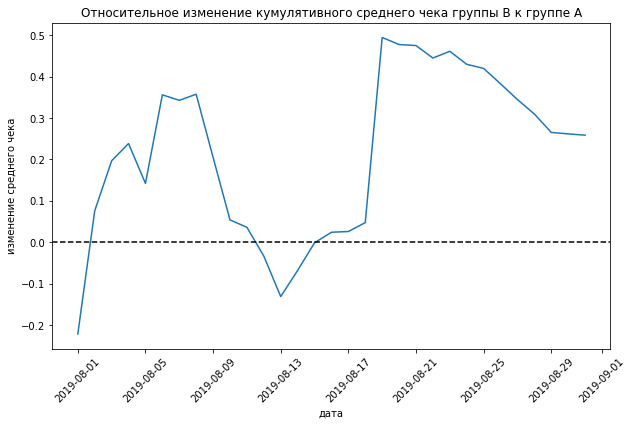

In [17]:
# собираем данные в одном датафрейме
merged_cum_rev = cum_rev_a.merge(cum_rev_b, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(merged_cum_rev['date'], (merged_cum_rev['revenueB']/merged_cum_rev['ordersB'])/(merged_cum_rev['revenueA']/merged_cum_rev['ordersA'])-1)

# добавляем ось X
plt.xticks(rotation=45)
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A');
plt.ylabel('изменение среднего чека');
plt.xlabel('дата')
plt.axhline(y=0, color='black', linestyle='--');

В нескольких точках график различия между сегментами резко резко меняется. Это еще одно подтверждение, что в данных есть выбросы,которые необходимо найти.

<b>3.4. График кумулятивной конверсии по группам. Выводы и предположения.

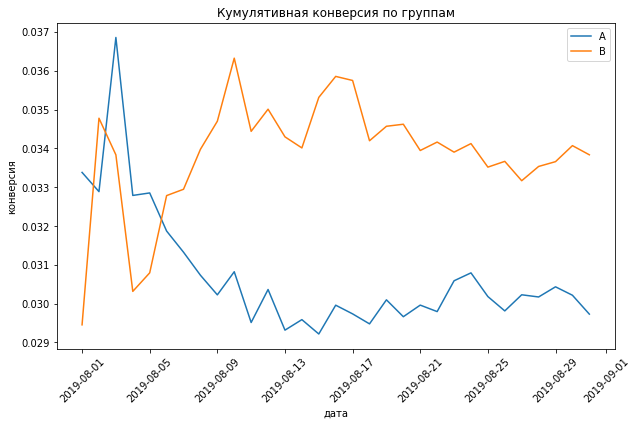

In [18]:
# считаем кумулятивную конверсию
cum_data['conversion'] = cum_data['orders']/cum_data['visitors']

# отделяем данные по группе A
cum_data_a = cum_data[cum_data['group']=='A']

# отделяем данные по группе B
cum_data_b = cum_data[cum_data['group']=='B']

# строим графики
plt.plot(cum_data_a['date'], cum_data_a['conversion'], label='A')
plt.plot(cum_data_b['date'], cum_data_b['conversion'], label='B')
plt.legend()
plt.title('Кумулятивная конверсия по группам');
plt.ylabel('конверсия');
plt.xlabel('дата');
# задаем масштаб осей
#["2019-04-01", '2019-04-23', 0, 0.015]
plt.xticks(rotation=45)
plt.axis(); 

Данные графики также стабилизируются к концу и колеблются вокруг похожих значений. Видим, что кумулятивная конверсия группы В выше, чем группы А.

<b>3.5. График относительного изменения кумулятивной конверсии группы B к группе A. Выводы и предположения.

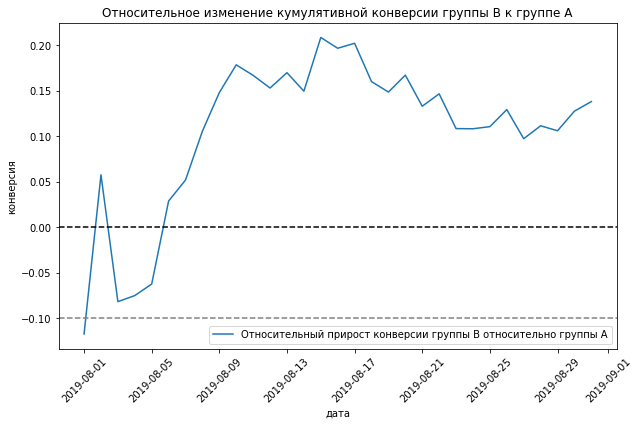

In [19]:
merged_cum_conv = cum_data_a[['date','conversion']].merge(cum_data_b[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(merged_cum_conv['date'], merged_cum_conv['conversionB']/merged_cum_conv['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.title('Относительное изменение кумулятивной конверсии группы B к группе A');
plt.ylabel('конверсия');
plt.xlabel('дата');
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--');

В начале теста группа В выглядела более "бледно", чем группа А. Однако с течением эксперимента ситуация поменялась и она стала лидером. Это можно считать продолжением предыдущего графика, вывод подтверждается. Однако картину в целом нельзя назвать устоявшейся. Очевидно, что нужна очистка данных от выбросов, тогда можно увидеть более достоверную картину.

<b> 3.6. Точечный график количества заказов по пользователям. Выводы и предположения.

            u_id  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


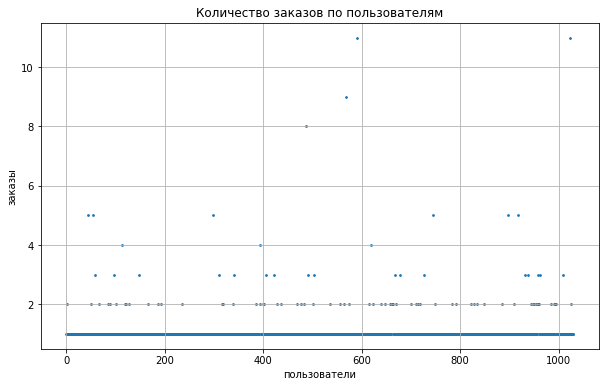

In [20]:
orders_per_u = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('u_id', as_index=False).agg({'tr_id' : pd.Series.nunique})
orders_per_u.columns = ['u_id','orders']

print(orders_per_u.sort_values(by='orders',ascending=False).head(10))

x_values = pd.Series(range(0,len(orders_per_u)))
plt.grid(True)
plt.title('Количество заказов по пользователям');
plt.ylabel('заказы');
plt.xlabel('пользователи');
plt.scatter(x_values, orders_per_u['orders'], s=3);

Большинство пользователей делают один заказ. Все, что больше одного можно считать аномалиями.

<b> 3.7. 95-й и 99-й перцентили количества заказов на пользователя. Выбор границы для определения аномальных пользователей.

In [21]:
np.percentile(orders_per_u['orders'], [90,95,99])

array([1., 2., 4.])

Не более 5% пользователей совершали 2 и более заказов и не более 1% совершали до 4 заказов. Примем это количество за выбросы, в дальнейшем отфильтруем по этой величине (т.е. менее 2).

<b> 3.8. Точечный график стоимостей заказов. Выводы и предположения.

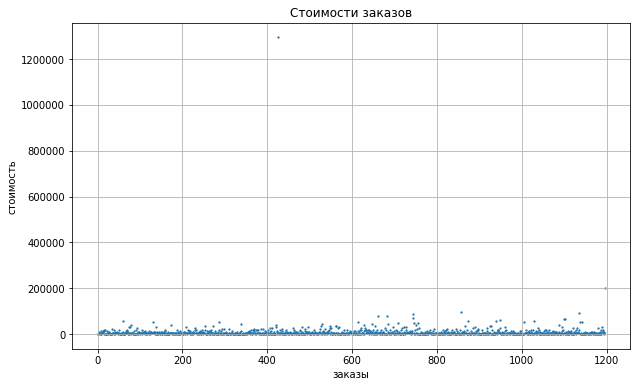

In [22]:
x_values = pd.Series(range(0,len(orders)))
plt.grid(True)
plt.title('Стоимости заказов');
plt.ylabel('стоимость');
plt.xlabel('заказы');
plt.scatter(x_values, orders['revenue'], s=1.5);

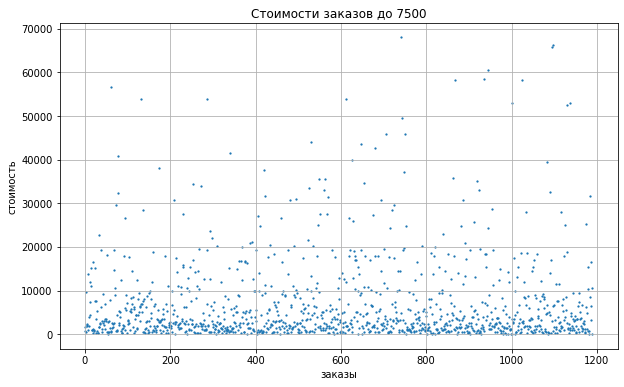

In [23]:
#посмотрим повнимательнее интервал до 75000
orders_lim = orders[orders['revenue']<75000]
x_values = pd.Series(range(0,len(orders_lim)))
plt.grid(True)
plt.title('Стоимости заказов до 7500');
plt.ylabel('стоимость');
plt.xlabel('заказы');

plt.scatter(x_values, orders_lim['revenue'], s=1.5);

Основное количеств
Всё, как предполагали: есть немного дорогих заказов. По графику можно выбрать границу аномальных заказов между 20 000 и 40 000 рублей. Однако принято отсеивать от 1% до 5% наблюдений с крайними значениями.

<b> 3.9. 95-й и 99-й перцентили стоимости заказов. Выбор границы для определения аномальных заказов.

In [24]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


не более 5% заказов были сделаны на сумму до 28000 и не более чем 1% на сумму до 58300. 
Исходя из этих данных, а также из графика выше, примем верхнюю границу для анализа прибыли в 40000, т.е. заказы свыше этой суммы будем считать аномальными.

<b>3.10. Статистическая значимость различий в конверсии между группами по «сырым» данным. Выводы и предположения.

In [25]:
#посчитаем количество визитов по дням в день в группе А
vis_a_daily = visitors[visitors['group']=='A'][['date', 'visitors']]
vis_a_daily.columns = ['date', 'vis_a_daily']

#посчитаем кумулятивное количество визитов в А по дням нарастающим итогом
vis_a_cum = vis_a_daily.apply(lambda x: vis_a_daily[vis_a_daily['date'] <= x['date']].agg({'date' : 'max', 'vis_a_daily' : 'sum'}), axis=1)
vis_a_cum.columns = ['date', 'vis_a_cum']

#посчитаем количество визитов по дням в день в группе В
vis_b_daily = visitors[visitors['group']=='B'][['date', 'visitors']]
vis_b_daily.columns = ['date', 'vis_b_daily']

#посчитаем кумулятивное количество визитов в В по дням нарастающим итогом
vis_b_cum = vis_b_daily.apply(lambda x: vis_b_daily[vis_b_daily['date'] <= x['date']].agg({'date' : 'max', 'vis_b_daily' : 'sum'}), axis=1)
vis_b_cum.columns = ['date', 'vis_b_cum']

#количество заказов в день в группе А с количеством транзакций и суммированием выручки
orders_a_daily = orders[orders['group']=='A'][['date', 'tr_id', 'u_id', 'revenue']]\
    .groupby('date', as_index=False).agg({'tr_id' : pd.Series.nunique, 'revenue' : 'sum'})
orders_a_daily.columns = ['date', 'orders_a_daily', 'rev_a_daily']

#кумулятивное количество заказов и выручки по дням в группе А
orders_a_cum = orders_a_daily.apply(
    lambda x: \
        orders_a_daily[orders_a_daily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'orders_a_daily' : 'sum',
                'rev_a_daily' : 'sum'}), axis=1).sort_values(by=['date'])
orders_a_cum.columns = ['date', 'orders_a_cum', 'rev_a_cum']
#вариант сокращения кода для суммирования только выручки нарастающим итогом
#orders_a_cum['test'] = np.cumsum(orders_a_daily['rev_a_daily'])

#количество заказов в день в группе В с количеством транзакций и суммированием выручки
orders_b_daily = orders[orders['group']=='B'][['date', 'tr_id', 'u_id', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'tr_id' : pd.Series.nunique, 'revenue' : 'sum'})
orders_b_daily.columns = ['date', 'orders_b_daily', 'rev_b_daily']

#кумулятивное количество заказов и выручки по дням в группе В
orders_b_cum = orders_b_daily.apply(
    lambda x: \
        orders_b_daily[orders_b_daily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'orders_b_daily' : 'sum',
                'rev_b_daily' : 'sum'}), axis=1).sort_values(by=['date'])
orders_b_cum.columns = ['date', 'orders_b_cum', 'rev_b_cum']

#объединяем данные в одну таблицу
data = orders_a_daily.merge(orders_b_daily, left_on='date', right_on='date', how='left')\
    .merge(orders_a_cum, left_on='date', right_on='date', how='left')\
    .merge(orders_b_cum, left_on='date', right_on='date', how='left')\
    .merge(vis_a_daily, left_on='date', right_on='date', how='left')\
    .merge(vis_b_daily, left_on='date', right_on='date', how='left')\
    .merge(vis_a_cum, left_on='date', right_on='date', how='left')\
    .merge(vis_b_cum, left_on='date', right_on='date', how='left')

data.head(2)


,date,orders_a_daily,rev_a_daily,orders_b_daily,rev_b_daily,orders_a_cum,rev_a_cum,orders_b_cum,rev_b_cum,vis_a_daily,vis_b_daily,vis_a_cum,vis_b_cum
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294


Сформулируем гипотезы:

Нулевая гипотеза: конверсии в группах А и В не отличаются

Алтернативная гипотеза: конверсии в группах А и В различны

In [26]:
# Критический уровень статистической значимости. Если p-value будет меньше него, нужно отвергнуть гипотезу
alpha=0.05

In [27]:
ord_by_u_a = orders[orders['group']=='A'].groupby('u_id', as_index=False).agg({'tr_id' : pd.Series.nunique})
ord_by_u_a.columns = ['u_id', 'orders']

ord_by_u_b = orders[orders['group']=='B'].groupby('u_id', as_index=False).agg({'tr_id' : pd.Series.nunique})
ord_by_u_b.columns = ['u_id', 'orders'] 

 
sample_a = pd.concat([ord_by_u_a['orders'], pd.Series(0, index=np.arange(data['vis_a_daily'].sum() - len(ord_by_u_a['orders'])), name='orders')],axis=0)
sample_b = pd.concat([ord_by_u_b['orders'], pd.Series(0, index=np.arange(data['vis_b_daily'].sum() - len(ord_by_u_b['orders'])), name='orders')],axis=0) 
 
print('p-value', "{0:.5f}".format(stats.mannwhitneyu(sample_a, sample_b, alternative = 'two-sided')[1]))
print('различие между группами в конверсии по сырым данным:',"{0:.3f}".format((data['orders_b_daily'].sum()/data['vis_b_daily'].sum())/(data['orders_a_daily'].sum()/data['vis_a_daily'].sum())-1))

p-value 0.01679
различие между группами в конверсии по сырым данным: 0.138


P-value меньше 0.05, следовательно нулевую гипотезу отвергаем. При анализе данных с выбросами видим, что в конверсии между группами есть статистически значимые отличия. 
Относительный прирост конверсии группы В к конверии группы А 13.8%.

<b> 3.11. Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным. Выводы и предположения.

Нулевая гипотеза: средние чеки в группах А и В не отличаются

Алтернативная гипотеза: средние чеки в группах А и В различны

In [28]:
print('p-value:',"{0:.5f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative = 'two-sided')[1]))
print('различие между группами в среднем чеке по сырым данным:',"{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

p-value: 0.72929
различие между группами в среднем чеке по сырым данным: 0.259


P-value больше 0.05, не получилось отвергнуть нулевую гипотезу. 
Относительное различие между группами в среднем чеке 25.9%.
Такое различие в параметрах подтверждает необходимость очистки данных от выбросов и пересчета значений по ним.

<b> 3.12. Статистическая значимость различий в конверсии между группами по «очищенным» данным. Выводы и предположения.

In [29]:
#очистим данные от анномалий
#исходя из расчетов выше примем за аномально дорогие заказы более 20000, и заказчиков, совершивших 2 и более заказов, 
#отфильтруем их и в следующей ячейке исключим из расчета

usersWithManyOrders = pd.concat([ord_by_u_a[ord_by_u_a['orders'] > 1]['u_id'], ord_by_u_b[ord_by_u_b['orders'] > 1]['u_id']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['u_id']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
abnormalUsers.head(5)

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: u_id, dtype: int64

Гипотезы для очищенных данных будут звучать так же:

Нулевая гипотеза: конверсии в группах А и В не отличаются

Алтернативная гипотеза: конверсии в группах А и В различны

In [30]:
#считаем статистическую значимость различий конверсий по очищенным данным
sample_a_filt = pd.concat([ord_by_u_a[np.logical_not(ord_by_u_a['u_id']\
                .isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['vis_a_daily'].sum() \
                                                           - len(ord_by_u_a['orders'])),name='orders')],axis=0)

sample_b_filt = pd.concat([ord_by_u_b[np.logical_not(ord_by_u_b['u_id']\
                .isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(data['vis_b_daily'].sum()\
                                                            - len(ord_by_u_b['orders'])),name='orders')],axis=0)

print('p-value:',"{0:.5f}".format(stats.mannwhitneyu(sample_a_filt, sample_b_filt,alternative = 'two-sided')[1]))
print('различие между группами в конверсии по очищенным данным:',"{0:.3f}".format(sample_b_filt.mean()/sample_a_filt.mean()-1))

p-value: 0.01562
различие между группами в конверсии по очищенным данным: 0.168


P-value меньше 0.05, а значит статистически значимое различие между группами достигнуто  и нулевая гипотеза отвергнута.
Относительное различие между группами в конверсии по очищенным данным 16.8%.
Сегмент В лучше сегмента А.

<b> 3.13. Статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Выводы и предположения.

Нулевая гипотеза: средние чеки в группах А и В не отличаются

Алтернативная гипотеза: средние чеки в группах А и В различны

In [31]:
print('p-value:',"{0:.5f}".format(stats.mannwhitneyu(
    orders[np.logical_and(orders['group']=='A', np.logical_not(orders['u_id'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(orders['group']=='B', np.logical_not(orders['u_id'].isin(abnormalUsers)))]['revenue'], alternative = 'two-sided')[1]))

print('различие между группами в среднем чеке по очищенным данным:',"{0:.5f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['u_id'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['u_id'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

p-value: 0.83543
различие между группами в среднем чеке по очищенным данным: -0.00646


P-value больше 0.05, а значит не получилось отвергнуть нулевую гипотезу, а также статистически значимых различий в среднем чеке между группами нет. Относительное различие между группами в среднем чеке по очищенным данным -0.64%.
Это означает, что средний чек группы В меньше среднего чека группы А на 0.64%.

<b> 3.14. Принятие решения по результатам теста и его объяснение.</b>
    
Варианты решений: 
    
1. Остановить тест, зафиксировать победу одной из групп. 
    
2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

<b> Вывод: </b>

Из анализа среднего чека по очищенным данным видим, что они почти одинаковые, группа А несущественно превосходит группу В. Однако конверсия в группе В почти на 17% выше конверсии в группе А. На этом основании можно остановить тест и зафиксировать победу группы В.